<a href="https://colab.research.google.com/github/ShubhankarPoundrik/NLP_Project/blob/main/Final_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
import re
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Evaluating the Final Genrated sentences

In [4]:
#df = pd.read_csv('/content/drive/MyDrive/inference_results.csv')
df = pd.read_csv('/content/drive/MyDrive/predicted_data.csv')
df

,row_id,image_id,question,answer,generated_answer
0,0,289343,Where is the dog located in the image?,The dog is located at the middleRight of the i...,The dog is located at the middleLeft of the im...
1,1,289343,Where is the person located in the image?,The person is located at the middleCenter of t...,The person is located at the middleCenter of t...
2,2,289343,Where is the dog located in the image and wher...,The dog is located at the middleRight and the ...,The dog is located at the middleLeft and the p...
3,3,289343,Where are the dog and the person located in th...,The dog is located at the middleRight and the ...,The dog is located at the middleLeft and the p...
4,4,289343,What is the position of the dog in the image?,The dog is located at the middleRight of the i...,The dog is located at the middleLeft of the im...
...,...,...,...,...,...
4995,4995,226984,Provide information about the location of the ...,The oven is located at the middleCenter of the...,The oven is located at the middleCenter of the...
4996,4996,226984,Elaborate on the whereabouts of the sink in th...,The sink is located at the middleLeft of the i...,The sink is located at the middleCenter of the...
4997,4997,226984,Provide information about the location of the ...,The oven is located at the middleCenter and th...,The oven is located at the middleCenter and th...
4998,4998,226984,Provide information about the location of the ...,The oven is located at the middleCenter and th...,The oven is located at the middleCenter and th...


In [5]:
data_list = []
for _, row in df.iterrows():
    answer = row['answer']
    generated_answer = row['generated_answer']
    data_list.append((answer, generated_answer))

In [6]:
list_size = len(data_list)
print(f"The size of the list is: {list_size}")


The size of the list is: 5000


Fetch the category and object from the answer

In [7]:
def extract_object(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)

    for token, pos in tagged_tokens:
        if pos in ['NN', 'NNS']:
            return token
    return None

def extract_positions(sentence):

    pattern = r'\b(topLeft|topCenter|topRight|middleRight|middleCenter|middleLeft|bottomLeft|bottomCenter|middleRight)\b'

    # Search for the pattern in the sentence
    match = re.search(pattern, sentence)

    # If a match is found, return the matched position
    if match:
        return match.group(1)
    else:
        return None

In [8]:
def getObjectAndPosition(sentences):
  result_dict = {}
  statements = sentences.split("and")
  for statement in statements:
    extracted_object = extract_object(statement)
    extracted_position = extract_positions(statement)
    result_dict[extracted_object] = extracted_position
  return result_dict

def evaluatedScore(index,original_dict, generated_dict):
  total_score = 0

  # Iterate through the keys of dict1
  for key in original_dict:
    if key in generated_dict:

      #Calculating total score for accuracy
      if original_dict[key] == generated_dict[key]:
        total_score+=1
      else:
        print(f"Index: {index} , Values for key '{key}' are not equal.")
    else:
      print(f"Key '{key}' is not present in Genrated Dictionary , Index: {index}.")
  return total_score

In [9]:
original_values_array = np.array([])
generated_values_array = np.array([])
pos_score = 0
total_sentences = 0
for index, data_info in enumerate(data_list):
    orig_answer, gen_answer = data_info
    orig_objPos = getObjectAndPosition(orig_answer)
    gen_objPos = getObjectAndPosition(gen_answer)
    total_sentences += len(orig_objPos)
    pos_score += evaluatedScore(index,orig_objPos,gen_objPos)
print(f'Positve Score {pos_score} , totalSentences:- {total_sentences}, Accuracy = {pos_score*100/total_sentences}')

Index: 0 , Values for key 'dog' are not equal.
Index: 2 , Values for key 'dog' are not equal.
Index: 3 , Values for key 'dog' are not equal.
Index: 4 , Values for key 'dog' are not equal.
Index: 6 , Values for key 'dog' are not equal.
Index: 7 , Values for key 'dog' are not equal.
Index: 8 , Values for key 'dog' are not equal.
Index: 10 , Values for key 'dog' are not equal.
Index: 11 , Values for key 'dog' are not equal.
Index: 13 , Values for key 'bench' are not equal.
Index: 15 , Values for key 'bench' are not equal.
Index: 17 , Values for key 'bench' are not equal.
Index: 18 , Values for key 'bench' are not equal.
Index: 24 , Values for key 'bench' are not equal.
Index: 26 , Values for key 'bench' are not equal.
Index: 27 , Values for key 'bench' are not equal.
Index: 28 , Values for key 'bench' are not equal.
Index: 30 , Values for key 'bench' are not equal.
Index: 31 , Values for key 'bench' are not equal.
Index: 32 , Values for key 'bench' are not equal.
Index: 34 , Values for ke

The above printed index are the row id (inference.csv (5000 rows)) where the positions of categories doesn't match

In [10]:
print(f'Positve Score {pos_score} , totalSentences:- {total_sentences}, Accuracy = {pos_score*100/total_sentences}')

Positve Score 2707 , totalSentences:- 7575, Accuracy = 35.73597359735974


In [11]:
precision = precision_score(original_values_array, generated_values_array, average='weighted',zero_division=1)
recall = recall_score(original_values_array, generated_values_array, average='weighted',zero_division=1)
f1 = f1_score(original_values_array, generated_values_array, average='weighted',zero_division=1)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Evaluating the output of Classification Model

In [12]:
df1 = pd.read_csv('/content/drive/MyDrive/inference_results_cls.csv')
df1

,row_id,image_id,positionName,categoryName,predictedPosition
0,0,289343,middleRight,dog,middleRight
1,1,61471,bottomCenter,dog,bottomCenter
2,2,472375,middleCenter,dog,middleCenter
3,3,520301,middleCenter,dog,middleCenter
4,4,579321,middleCenter,dog,middleCenter
...,...,...,...,...,...
4995,4995,424521,middleLeft,skateboard,middleLeft
4996,4996,428111,middleLeft,skateboard,bottomLeft
4997,4997,72281,bottomCenter,skateboard,bottomCenter
4998,4998,84492,middleRight,skateboard,middleRight


In [13]:
predictionScore = 0
totalSize = df1.shape[0]

actual_positions = df1['positionName']
generated_positions = df1['predictedPosition']

conf_matrix = confusion_matrix(actual_positions, generated_positions)

for _, row in df1.iterrows():
    actual_position = row['positionName']
    generated_position = row['predictedPosition']

    if actual_position == generated_position:
        predictionScore += 1

accuracy = (predictionScore * 100) / totalSize

print(f'Prediction Score: {predictionScore}, Total Size: {totalSize}, Accuracy: {accuracy}')


Prediction Score: 3254, Total Size: 5000, Accuracy: 65.08


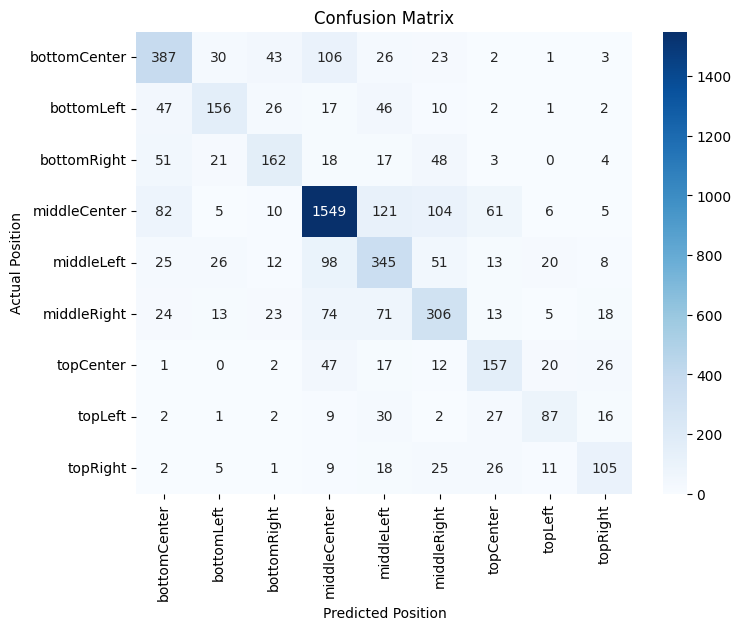

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df1['positionName'].unique()), yticklabels=sorted(df1['positionName'].unique()))
plt.xlabel('Predicted Position')
plt.ylabel('Actual Position')
plt.title('Confusion Matrix')
plt.show()

The x-axis and y-axis of the heatmap represent the predicted and actual positions, respectively. Each cell in the heatmap shows the count of instances where the actual position and predicted position match. The diagonal elements represent correct predictions, while off-diagonal elements represent incorrect predictions.

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(actual_positions, generated_positions, average='weighted')
recall = recall_score(actual_positions, generated_positions, average='weighted')
f1 = f1_score(actual_positions, generated_positions, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Precision: 0.65
Recall: 0.65
F1 Score: 0.65
